*****CNN trained for MNIST handwritten digit classification*****

1- Use any CNN trained for MNIST handwritten digit classification (that classify between the digits from 0 to 9).
2- After training the model, evaluate it using the testing data and get the predicted class of the testing image samples.
3- By comparing the predicted class labels with the actual class labels (Ground Truth), build the Confusion Matrix of the ten classes (digits from 0 to 9).
4- For each class (digit):
Calculate the precision, recall, F1 score.

*****IMPORTING*****

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from keras.layers.convolutional import Conv2D  # to add convolutional layers
from keras.layers.convolutional import MaxPooling2D  # to add pooling layers
from keras.layers import Flatten  # to flatten data for fully connected layers
import itertools
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

*****LOADING DATA*****

In [2]:
# import data
from keras.datasets import mnist

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

In [3]:
X_train = X_train / 255  # normalize training data
X_test = X_test / 255  # normalize test data
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1]  # number of categories

*****BUILDING MODEL*****

In [4]:
def convolutional_model():
    # create model
    model = Sequential()
    model.add(Conv2D(16, (5, 5), strides=(1, 1), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [5]:
# build the model
model = convolutional_model()

# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, verbose=2)

# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: {} \n Error: {}".format(scores[1], 100 - scores[1] * 100))


2022-05-31 16:25:06.326093: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/20
1875/1875 - 6s - loss: 0.1539 - accuracy: 0.9550 - val_loss: 0.0604 - val_accuracy: 0.9810 - 6s/epoch - 3ms/step
Epoch 2/20
1875/1875 - 6s - loss: 0.0538 - accuracy: 0.9831 - val_loss: 0.0520 - val_accuracy: 0.9836 - 6s/epoch - 3ms/step
Epoch 3/20
1875/1875 - 6s - loss: 0.0366 - accuracy: 0.9884 - val_loss: 0.0365 - val_accuracy: 0.9875 - 6s/epoch - 3ms/step
Epoch 4/20
1875/1875 - 6s - loss: 0.0253 - accuracy: 0.9921 - val_loss: 0.0356 - val_accuracy: 0.9883 - 6s/epoch - 3ms/step
Epoch 5/20
1875/1875 - 5s - loss: 0.0179 - accuracy: 0.9944 - val_loss: 0.0405 - val_accuracy: 0.9875 - 5s/epoch - 3ms/step
Epoch 6/20
1875/1875 - 5s - loss: 0.0127 - accuracy: 0.9957 - val_loss: 0.0432 - val_accuracy: 0.9879 - 5s/epoch - 3ms/step
Epoch 7/20
1875/1875 - 6s - loss: 0.0097 - accuracy: 0.9969 - val_loss: 0.0451 - val_accuracy: 0.9876 - 6s/epoch - 3ms/step
Epoch 8/20
1875/1875 - 6s - loss: 0.0084 - accuracy: 0.9973 - val_loss: 0.0465 - val_accuracy: 0.9872 - 6s/epoch - 3ms/step
Epoch 9/

*****SAMPLES OF PREDICTED DATA*****

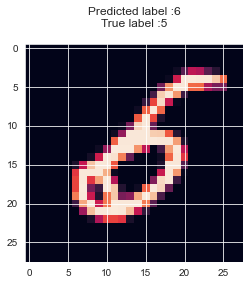

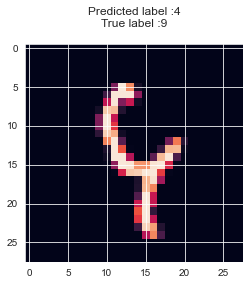

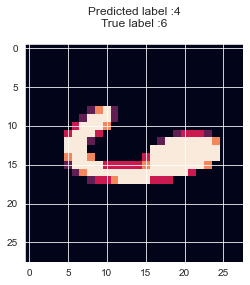

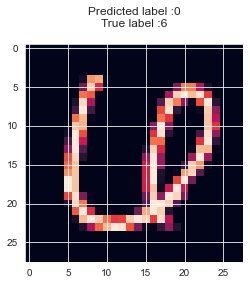

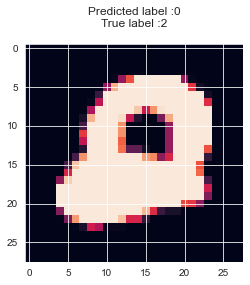

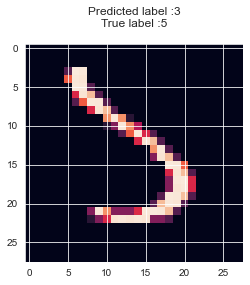

In [6]:

# Predict the values from the validation dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred, axis=1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis=1)

errors = (Y_pred_classes - Y_true != 0)
Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_test[errors]


def display_errors(errors_index, img_errors, pred_errors, obs_errors):
    n = 0
    while n < 6:
        fig, ax = plt.subplots(sharex=True, sharey=True, squeeze=True)
        error = errors_index[n]
        ax.imshow((img_errors[error]).reshape((28, 28)))
        ax.set_title("Predicted label :{}\nTrue label :{}\n".format(pred_errors[error], obs_errors[error]))
        n += 1


# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors, axis=1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)


*****CONFUSION MATRIX*****

/var/folders/ks/m0btnx4d7j38phjw29dfybvw0000gn/T/ipykernel_4939/3683056058.py:7: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


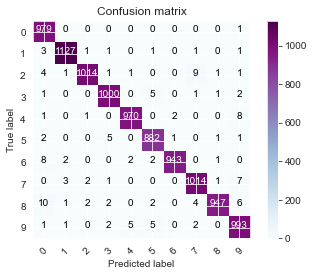

In [7]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.BuPu):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes=range(10))

*****METRICS FOR EACH CLASS*****

In [8]:
for i in range(len(confusion_mtx)):
    print("Class#{}".format(i))
    fp = 0
    fn = 0
    tp = confusion_mtx[i][i]
    for x in range(len(confusion_mtx)):
        if confusion_mtx[x][i] != confusion_mtx[i][i]:
            fp += confusion_mtx[x][i]
    for y in range(len(confusion_mtx)):
        if confusion_mtx[i][y] != confusion_mtx[i][i]:
            fn += confusion_mtx[i][y]
    Precision = tp / (tp + fp)
    Recall = tp / (tp + fn)
    F1_score = 2 * Precision * Recall / (Precision + Recall)
    print("Precision:",round(Precision, 4))
    print("Recall:",round(Recall, 4))
    print("F1_score:",round(F1_score, 4))

Class#0
Precision: 0.9703
Recall: 0.999
F1_score: 0.9844
Class#1
Precision: 0.993
Recall: 0.993
F1_score: 0.993
Class#2
Precision: 0.9941
Recall: 0.9826
F1_score: 0.9883
Class#3
Precision: 0.9881
Recall: 0.9901
F1_score: 0.9891
Class#4
Precision: 0.9918
Recall: 0.9878
F1_score: 0.9898
Class#5
Precision: 0.9833
Recall: 0.9888
F1_score: 0.986
Class#6
Precision: 0.9968
Recall: 0.9843
F1_score: 0.9905
Class#7
Precision: 0.9835
Recall: 0.9864
F1_score: 0.9849
Class#8
Precision: 0.9947
Recall: 0.9723
F1_score: 0.9834
Class#9
Precision: 0.9735
Recall: 0.9841
F1_score: 0.9788
